## Seminar: Dealing with Word Embeddings

Today we gonna play with word embeddings: train our own little embedding, load one from   gensim model zoo and use it to visualize text corpora.

This whole thing is gonna happen on top of embedding dataset.

__Requirements:__ if you're running locally, in the selected environment run the following command:

```pip install --upgrade nltk gensim bokeh umap-learn```


In [1]:
import itertools
import string

import numpy as np
import umap
from nltk.tokenize import WordPunctTokenizer

from matplotlib import pyplot as plt

from IPython.display import clear_output

C:\Users\user\AppData\Roaming\Python\Python38\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\user\AppData\Roaming\Python\Python38\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\user\AppData\Roaming\Python\Python38\site-packages\umap\distances.py:

In [3]:
# download the data:
!wget "https://www.dropbox.com/s/obaitrix9jyu84r/quora.txt?dl=1" -O ./quora.txt -nc
# alternative download link: https://yadi.sk/i/BPQrUu1NaTduEw

"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [2]:
data = list(open("data/quora.txt", encoding="utf-8"))
data[50]

"What TV shows or books help you read people's body language?\n"

__Tokenization:__ a typical first step for an nlp task is to split raw data into words.
The text we're working with is in raw format: with all the punctuation and smiles attached to some words, so a simple str.split won't do.

Let's use __`nltk`__ - a library that handles many nlp tasks like tokenization, stemming or part-of-speech tagging.

In [3]:
tokenizer = WordPunctTokenizer()

print(tokenizer.tokenize(data[50]))

['What', 'TV', 'shows', 'or', 'books', 'help', 'you', 'read', 'people', "'", 's', 'body', 'language', '?']


In [4]:
# TASK: lowercase everything and extract tokens with tokenizer. 
# data_tok should be a list of lists of tokens for each line in data.

data_tok = [tokenizer.tokenize(x.lower()) for x in data] # YOUR CODE HEER

Let's peek at the result:

In [5]:
' '.join(data_tok[0])

"can i get back with my ex even though she is pregnant with another guy ' s baby ?"

Small check that everything is alright

In [6]:
assert all(isinstance(row, (list, tuple)) for row in data_tok), "please convert each line into a list of tokens (strings)"
assert all(all(isinstance(tok, str) for tok in row) for row in data_tok), "please convert each line into a list of tokens (strings)"
is_latin = lambda tok: all('a' <= x.lower() <= 'z' for x in tok)
assert all(map(lambda l: not is_latin(l) or l.islower(), map(' '.join, data_tok))), "please make sure to lowercase the data"

### Using pre-trained model

Imagine training life-sized (100~300D) word embeddings on gigabytes of text: wikipedia articles or twitter posts. 

Thankfully, nowadays you can get a pre-trained word embedding model in 2 lines of code (no sms required, promise).

In [7]:
import gensim.downloader as api
model = api.load('glove-twitter-25')

In [8]:
model.most_similar(positive=["barcelona"], negative=['footbal', 'soccer'])

[('miras', 0.7537336945533752),
 ('sonríe', 0.7082312703132629),
 ('كُنت', 0.6860615611076355),
 ('لمّ', 0.6726158261299133),
 ('لمَ', 0.6724483370780945),
 ('فعلت', 0.6719395518302917),
 ('mueres', 0.6652112603187561),
 ('demuéstrale', 0.6604809165000916),
 ('好きなものに一直線n', 0.652863085269928),
 ('بي', 0.6473698019981384)]

### Visualizing word vectors

One way to see if our vectors are any good is to plot them. Thing is, those vectors are in 30D+ space and we humans are more used to 2-3D.

Luckily, we machine learners know about __dimensionality reduction__ methods.

Let's use that to plot 1000 most frequent words

In [10]:
len(model.key_to_index)

1193514

In [17]:
words = sorted(model.key_to_index.keys(), 
               key=lambda word: model.key_to_index[word],
               reverse=True)[:10000]

print(words[::100])

['ﾟﾟﾟｵﾔｽﾐｰ', '자는것도', '민통이', '過去の貴重な事例に学ぶことが重要だと思いました', '未開封であれば約', '分からないな', 'ツイッターで一番稼げる方法', 'の人が挫折する障害を取り除いた即金ビジネスがあります', 'お夕飯', 'چیزای', 'وجعكِ', 'مايجيش', 'عالَم', 'تگلمت', 'الملائم', 'إنِيّ', 'пустыню', 'αρχίσουν', 'waddah', 'trenroca', 'suadades', 'sayeed', 'pv-gs', 'pagini', 'nsombong', 'mysound', 'macklemoore', 'kinahanglan', 'infiltrando', 'grinar', 'eşinizi', 'dialoguen', 'cnant', 'boiolice', 'askush', 'ﾖﾛｼｸお願いします', '응원하면', '디테일한', '許してはならない', '日間返金保障n', '円分又は', 'ヘイｐ', 'やばっw', 'さすがですｗ', 'เขาจะไม่พูดด้วยn', 'وفيته', 'مكانـه', 'فرصهم', 'حوبك', 'ببعضهما', 'اخيراا', 'сожгут', 'депрессивная', 'yongie', 'utsikten', 'takası', 'shareeka', 'recruting', 'pensanso', 'nبدمعة', 'nasshole', 'margu', 'kravis', 'jaboo', 'hahahahhahahahhaa', 'fiwc', 'dzalik', 'cv.nl', 'burgerschap', 'baike', 'adlandırılan', '키다리', '베이지', '鈴木明子n', '楽しい時間でした', '可愛いすぎます', 'プライド高い人のツイートは', 'めいたん', 'ご勘弁を', 'รู้มั๊ย', 'وعصبيه', 'مسيرة_خيانة_وطن', 'فاستبشروا', 'تَزول', 'الملائــكــه', 'إخراجهم', 'проституции', 'бано

In [18]:
# for each word, compute it's vector with model
word_vectors = np.asarray([model[x] for x in words])#  YOUR CODE

In [19]:
assert isinstance(word_vectors, np.ndarray)
assert word_vectors.shape == (len(words), 25)
assert np.isfinite(word_vectors).all()

In [20]:
word_vectors.shape

(10000, 25)

#### Linear projection: PCA

The simplest linear dimensionality reduction method is __P__rincipial __C__omponent __A__nalysis.

In geometric terms, PCA tries to find axes along which most of the variance occurs. The "natural" axes, if you wish.

<img src="https://github.com/yandexdataschool/Practical_RL/raw/master/yet_another_week/_resource/pca_fish.png" style="width:30%">


Under the hood, it attempts to decompose object-feature matrix $X$ into two smaller matrices: $W$ and $\hat W$ minimizing _mean squared error_:

$$\|(X W) \hat{W} - X\|^2_2 \to_{W, \hat{W}} \min$$
- $X \in \mathbb{R}^{n \times m}$ - object matrix (**centered**);
- $W \in \mathbb{R}^{m \times d}$ - matrix of direct transformation;
- $\hat{W} \in \mathbb{R}^{d \times m}$ - matrix of reverse transformation;
- $n$ samples, $m$ original dimensions and $d$ target dimensions;



In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(2)
scaler = StandardScaler()
# map word vectors onto 2d plane with PCA. Use good old sklearn api (fit, transform)
# after that, normalize vectors to make sure they have zero mean and unit variance
word_vectors_pca = pca.fit_transform(word_vectors) # YOUR CODE
word_vectors_pca = scaler.fit_transform(word_vectors_pca)
# and maybe MORE OF YOUR CODE here :)

In [22]:
assert word_vectors_pca.shape == (len(word_vectors), 2), "there must be a 2d vector for each word"
assert max(abs(word_vectors_pca.mean(0))) < 1e-5, "points must be zero-centered"
assert max(abs(1.0 - word_vectors_pca.std(0))) < 1e-2, "points must have unit variance"

#### Let's draw it!

In [23]:
import bokeh.models as bm, bokeh.plotting as pl
from bokeh.io import output_notebook
output_notebook()

def draw_vectors(x, y, radius=10, alpha=0.25, color='blue',
                 width=600, height=400, show=True, **kwargs):
    """ draws an interactive plot for data points with auxilirary info on hover """
    if isinstance(color, str): color = [color] * len(x)
    data_source = bm.ColumnDataSource({ 'x' : x, 'y' : y, 'color': color, **kwargs })

    fig = pl.figure(active_scroll='wheel_zoom', width=width, height=height)
    fig.scatter('x', 'y', size=radius, color='color', alpha=alpha, source=data_source)

    fig.add_tools(bm.HoverTool(tooltips=[(key, "@" + key) for key in kwargs.keys()]))
    if show: pl.show(fig)
    return fig

Loading BokehJS ...

In [24]:
draw_vectors(word_vectors_pca[:, 0], word_vectors_pca[:, 1], token=words)

# hover a mouse over there and see if you can identify the clusters

figure(id='p1004', ...)

### Visualizing neighbors with UMAP
PCA is nice but it's strictly linear and thus only able to capture coarse high-level structure of the data.

If we instead want to focus on keeping neighboring points near, we could use UMAP, which is itself an embedding method. Here you can read __[more on UMAP (ru)](https://habr.com/ru/company/newprolab/blog/350584/)__ and on __[t-SNE](https://distill.pub/2016/misread-tsne/)__, which is also an embedding.

In [25]:
embedding = umap.UMAP(n_neighbors=5).fit_transform(word_vectors) # преобразовываем

In [26]:
draw_vectors(embedding[:, 0], embedding[:, 1], token=words)

# hover a mouse over there and see if you can identify the clusters

figure(id='p1154', ...)

### Visualizing phrases

Word embeddings can also be used to represent short phrases. The simplest way is to take __an average__ of vectors for all tokens in the phrase with some weights.

This trick is useful to identify what data are you working with: find if there are any outliers, clusters or other artefacts.

Let's try this new hammer on our data!


In [30]:
def get_phrase_embedding(phrase):
    """
    Convert phrase to a vector by aggregating it's word embeddings. See description above.
    """
    # 1. lowercase phrase
    # 2. tokenize phrase
    # 3. average word vectors for all words in tokenized phrase
    # skip words that are not in model's vocabulary
    # if all words are missing from vocabulary, return zeros
    
    vector = np.zeros([model.vector_size], dtype='float32')
    phrase_tokenized = tokenizer.tokenize(phrase.lower()) # YOUR CODE HERE
    phrase_vectors = [model[x] for x in phrase_tokenized if x in model.key_to_index.keys()]

    if len(phrase_vectors) != 0:
        vector = np.mean(phrase_vectors, axis=0)
        
    return vector
        
    

In [31]:
data[402687]

'What gift should I give to my girlfriend on her birthday?\n'

In [32]:
get_phrase_embedding(data[402687])

array([-0.18204999,  0.30953574,  0.20861094,  0.07982156, -0.22565515,
       -0.33001748,  1.2495784 ,  0.13134292, -0.33788875,  0.06196944,
       -0.231793  ,  0.09389219, -4.9685497 , -0.23611419, -0.32609668,
       -0.092073  ,  0.4407505 , -0.75413746, -0.5389092 , -0.184752  ,
        0.07867809,  0.20018655, -0.16202375,  0.30375698, -0.41255665],
      dtype=float32)

In [33]:
vector = get_phrase_embedding("I'm very sure. This never happened to me before...")

In [34]:
vector

array([ 0.1663555 ,  0.0534049 ,  0.01988658, -0.14495362, -0.48189807,
        0.0201319 ,  1.1701978 ,  0.39422765, -0.5707375 ,  0.07880499,
       -0.34534982, -0.0293695 , -4.785525  ,  0.04907916, -0.08470917,
        0.1303215 ,  0.03921234, -0.18863894, -0.60683554, -0.4688374 ,
        0.12880965,  0.01707016,  0.16700326,  0.4306834 , -0.05759042],
      dtype=float32)

In [35]:
# let's only consider ~5k phrases for a first run.
chosen_phrases = data[::len(data) // 1000]

# compute vectors for chosen phrases and turn them to numpy array
phrase_vectors = np.asarray([get_phrase_embedding(x) for x in chosen_phrases]) # YOUR CODE

In [36]:
assert isinstance(phrase_vectors, np.ndarray) and np.isfinite(phrase_vectors).all()
assert phrase_vectors.shape == (len(chosen_phrases), model.vector_size)

In [37]:
# map vectors into 2d space with pca, tsne or your other method of choice
# don't forget to normalize

phrase_vectors_2d = umap.UMAP(n_neighbors=3).fit_transform(phrase_vectors) # преобразовываем
# phrase_vectors_2d = pca.fit_transform(phrase_vectors) # преобразовываем

# phrase_vectors_2d = scaler.fit_transform(phrase_vectors_2d)
# phrase_vectors_2d = (phrase_vectors_2d - phrase_vectors_2d.mean(axis=0)) / phrase_vectors_2d.std(axis=0)

In [38]:
draw_vectors(phrase_vectors_2d[:, 0], phrase_vectors_2d[:, 1],
             phrase=[phrase[:50] for phrase in chosen_phrases],
             radius=20,)

figure(id='p1318', ...)

Finally, let's build a simple "similar question" engine with phrase embeddings we've built.

In [39]:
# compute vector embedding for all lines in data
data_vectors = np.vstack([get_phrase_embedding(l) for l in data])

In [40]:
norms = np.linalg.norm(data_vectors, axis=1)

In [41]:
printable_set = set(string.printable)

In [42]:
data_subset = [x for x in data if set(x).issubset(printable_set)]

In [43]:
def find_nearest(query, k=10):
    """
    given text line (query), return k most similar lines from data, sorted from most to least similar
    similarity should be measured as cosine between query and line embedding vectors
    hint: it's okay to use global variables: data and data_vectors. see also: np.argpartition, np.argsort
    """
    # YOUR CODE
    query_vector = get_phrase_embedding(query)
    dists = data_vectors.dot(query_vector[:, None])[:, 0] / ((norms+1e-16)*np.linalg.norm(query_vector))
    nearest_elements = dists.argsort(axis=0)[-k:][::-1]
    out = [data[i] for i in nearest_elements]
    return out# <YOUR CODE: top-k lines starting from most similar>

In [44]:
results = find_nearest(query="How do I stay active?", k=5)

print(''.join(results))

# assert len(results) == 10 and isinstance(results[0], str)
# assert results[0] == 'How do I get to the dark web?\n'
# assert results[3] == 'What can I do to save the world?\n'

How do I stay active?
How do I always stay active?
How do I stay positive?
How do I stay fit?
How do I be friendly?



In [45]:
results = find_nearest(query="How do i enter the matrix?", k=10)

print(''.join(results))

assert len(results) == 10 and isinstance(results[0], str)
assert results[0] == 'How do I get to the dark web?\n'
# assert results[3] == 'What can I do to save the world?\n'

How do I get to the dark web?
What universal remote do I need and how do I set it up to a Blaupunkt TV?
How do I connect the ASUS_T00Q to my PC?
How do you print the gridlines in Excel 2010?
How do you print the gridlines in Excel 2007?
How do you print the gridlines in Excel 2003?
I would like to create a new website. What do I have to do?
How do I get the new Neko Atsume wallpapers? How do they work?
I want to experience the 4G network. Do I need to change my SIM card from 3G to 4G?
What do I have to do to sell my photography?



In [46]:
find_nearest(query="How does Trump?", k=10)

['What does Donald Trump think about Israel?\n',
 'Who or what is Donald Trump, really?\n',
 'Donald Trump: Why are there are so many questions about Donald Trump on Quora?\n',
 'Does anyone like Trump and Clinton?\n',
 'What does Cortana mean?\n',
 'Did Bill Gates outcompete and outsmart IBM? Why? How?\n',
 'Why and how is Bill Gates so rich?\n',
 'What does Donald Trump think about Pakistan?\n',
 'What do you think about Trump and Obama?\n',
 'Who and what is Quora?\n']

In [47]:
find_nearest(query="Why don't i ask a question myself?", k=10)

["Why don't my parents listen to me?\n",
 "Why don't people appreciate me?\n",
 "Why she don't interact with me?\n",
 "Why don't I get a date?\n",
 "Why don't I get a girlfriend?\n",
 "Why don't I have a girlfriend?\n",
 "Why don't I have a boyfriend?\n",
 "Why don't I like people touching me?\n",
 "Why can't I ask a question anonymously?\n",
 "Why don't you use Facebook much?\n"]

In [48]:
from sklearn.cluster import DBSCAN, KMeans

In [49]:
kmeans = KMeans(3)

In [50]:
labels = kmeans.fit_predict(np.asarray(phrase_vectors))

C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [51]:
_colors = ['red', 'green', 'blue']

In [52]:
draw_vectors(phrase_vectors_2d[:, 0], phrase_vectors_2d[:, 1], color=[_colors[l] for l in labels],
             phrase=[phrase[:50] for phrase in chosen_phrases],
             radius=20,)

figure(id='p1496', ...)

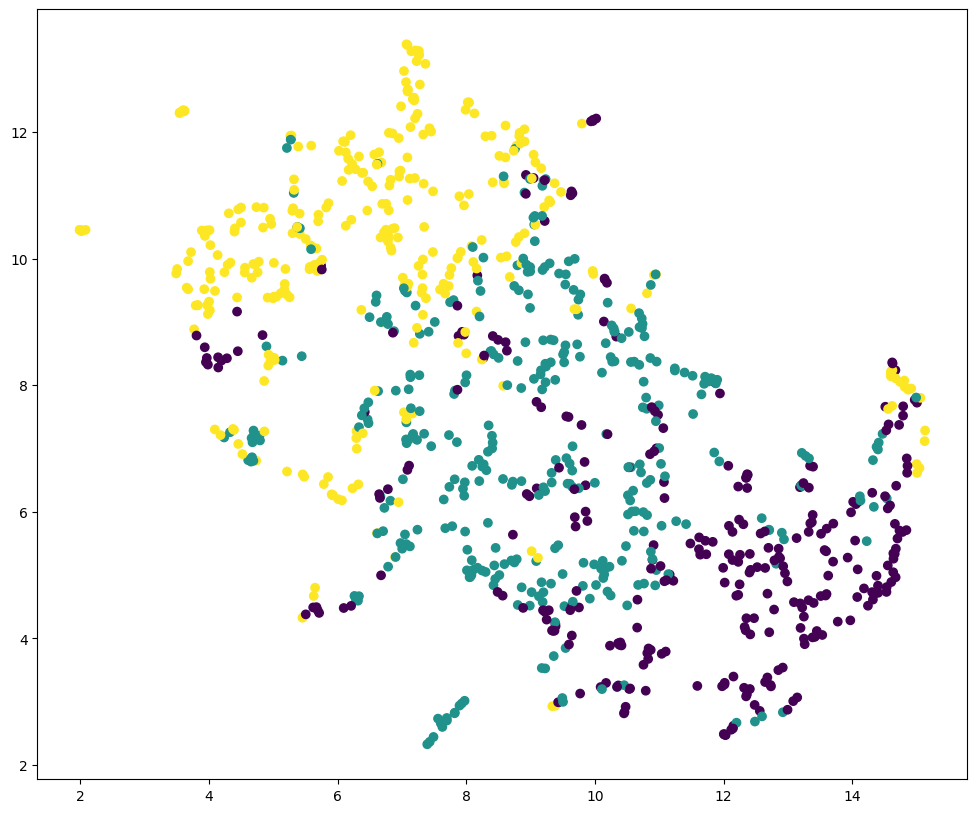

In [53]:
plt.figure(figsize=(12, 10))
plt.scatter(phrase_vectors_2d[:,0], phrase_vectors_2d[:, 1], c=labels.astype(float))

__Now what?__
* Try running TSNE instead of UMAP (it takes a long time)
* Try running UMAP or TSNEon all data, not just 1000 phrases
* See what other embeddings are there in the model zoo: `gensim.downloader.info()`
* Take a look at [FastText](https://github.com/facebookresearch/fastText) embeddings
* Optimize find_nearest with locality-sensitive hashing: use [nearpy](https://github.com/pixelogik/NearPy) or `sklearn.neighbors`.


